In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from python2 import *
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)


In [43]:
y = (y+1)/2

## Do your thing crazy machine learning thing here :) ...

In [41]:
tX4 = np.where(tX == -999, 0, tX)
weights, error = least_squares(y,tX)
tX3 = standardize(tX)
tx = np.c_[np.ones((y.shape[0], 1)), tX]
weigths4,error4 = least_squares(y,tx)
weights3, error3 = least_squares(y,tX3)
weights2, error2 = least_squares(y,tX2)
print(error3)
print(error2)
print(error4)

NameError: name 'tX2' is not defined

85667

In [215]:
tX4 = np.where(tX == -999, 0, tX)

In [216]:
tx5 = build_poly(tX4,9)

0.318992

In [217]:
weights4, error4 = least_squares(y,tx5)
loss_really(weights4,y,tx5)

0.187412

In [125]:
weights_r, error_r =  ridge_regression(y,tx,10e-4)
loss_really(weights_r,y,tx)

0.208412

In [198]:
weights, error = least_squares(y,tx)
loss_really(weights,y,tx)

LinAlgError: Singular matrix

In [108]:
gamma = 1
initial_w = np.zeros(tX.shape[1])
calculate_loss_sigmoid(y,tX,initial_w)
l , w = learning_by_gradient_descent(y,tX,initial_w,gamma)

In [86]:
calculate_loss_sigmoid(y,tX,w)

/Users/kevinrizk/Documents/GitHub/Project1/Kevin Rizk/scripts/python2.py:115: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-t))


8.31428403495654

In [69]:
error

0.29273084085570217

In [124]:
l, w = logistic_regression(y,tX,initial_w,40,1)
w

array([ 6.22247909e+02, -2.14031775e+02, -1.26608944e+02,  2.96897072e+01,
        8.23041713e+01,  1.69686797e+02,  8.05271229e+01, -2.22734508e+00,
       -3.45877138e+01, -1.43681571e+02, -4.60794567e+00,  3.00625740e+00,
        8.31509741e+01,  3.76655001e+01, -4.28904955e-02, -1.39152546e-01,
       -7.64983261e+01, -2.14565281e-02,  9.99532866e-02, -4.06459281e+01,
        1.84784400e-01, -2.01103537e+02, -2.46711846e+00,  1.92909579e+02,
        2.11914069e+02,  2.11921329e+02,  2.98315227e+01,  8.31869918e+01,
        8.31026703e+01, -1.04848722e+02])

In [135]:
loss_really(w,y,tX) 

[1. 0. 0. ... 0. 0. 0.]
[False False False ...  True False False]


0.311088

In [6]:
def loss_really(weights,y_te,tx_te):    
    y_pred = predict_labels(weights, tx_te)
    print(y_pred)
    s = y_pred != y_te
    return sum(s)/len(y_te)

In [130]:
def predict_labels2(weights, data):
    """Generates class predictions given weights, and a test data matrix"""
    y_pred = np.dot(data, weights)
    y_pred[np.where(y_pred <= 0.5)] = -1
    y_pred[np.where(y_pred > 0.5)] = 1
    
    return y_pred

In [12]:
def split_data(x, y, ratio, seed=6):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    data_size = len(y)
    n = int(ratio*data_size)
    shuffle_indices = np.random.permutation(np.arange(data_size))
    shuffled_y = y[shuffle_indices]
    shuffled_tx = x[shuffle_indices]
    tx_tr = shuffled_tx[0:n,:]
    tx_te = shuffled_tx[n+1:,:]
    y_tr = shuffled_y[0:n]
    y_te = shuffled_y[n+1:]
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    return tx_tr,tx_te,y_tr,y_te


In [207]:
tx_tr,tx_te,y_tr,y_te = split_data(tx5, y, 0.8)

In [208]:
weightsw, errorw = least_squares(y_tr,tx_tr)
loss_really(weightsw, y_tr, tx_tr)

0.18873

In [209]:
lambdas = np.logspace(-10,-3,num = 20)
lambdas

array([1.00000000e-10, 2.33572147e-10, 5.45559478e-10, 1.27427499e-09,
       2.97635144e-09, 6.95192796e-09, 1.62377674e-08, 3.79269019e-08,
       8.85866790e-08, 2.06913808e-07, 4.83293024e-07, 1.12883789e-06,
       2.63665090e-06, 6.15848211e-06, 1.43844989e-05, 3.35981829e-05,
       7.84759970e-05, 1.83298071e-04, 4.28133240e-04, 1.00000000e-03])

In [210]:
index = 0 
errors = []
weightss = []
for lambda_ in lambdas:
    weights_r, error_r =  ridge_regression(y_tr,tx_tr,lambda_)
    
    errors.append(loss_really(weights_r,y_te,tx_te))
    weightss.append(weights_r)


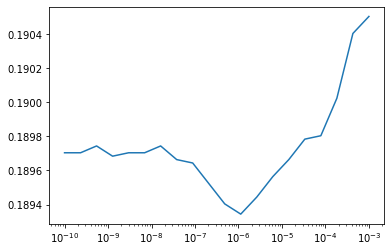

In [211]:
plt.semilogx(lambdas,errors)

In [174]:
weights = weightss[np.argmin(errors)]

In [175]:
loss_really(weights,y_te,tx_te)

0.1797271890875635

## Generate predictions and save ouput in csv format for submission:

In [71]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)


In [192]:
tx_test = build_poly(tX_test,7)

In [87]:
tX4_test = np.where(tX_test == -999, 0, tX_test)
tx4_test = build_poly(tX4_test,11)

In [88]:
OUTPUT_PATH = '../data/submission_test2.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tx4_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)